In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error

In [2]:
df = pd.read_csv("C:/Users\hp\Downloads\HMEQ_Scrubbed (1)\HMEQ_Loss.csv")

In [3]:
df.head(6)

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,335.0,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET_BAD_FLAG  5960 non-null   int64  
 1   TARGET_LOSS_AMT  1189 non-null   float64
 2   LOAN             5960 non-null   int64  
 3   MORTDUE          5442 non-null   float64
 4   VALUE            5848 non-null   float64
 5   REASON           5708 non-null   object 
 6   JOB              5681 non-null   object 
 7   YOJ              5445 non-null   float64
 8   DEROG            5252 non-null   float64
 9   DELINQ           5380 non-null   float64
 10  CLAGE            5652 non-null   float64
 11  NINQ             5450 non-null   float64
 12  CLNO             5738 non-null   float64
 13  DEBTINC          4693 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


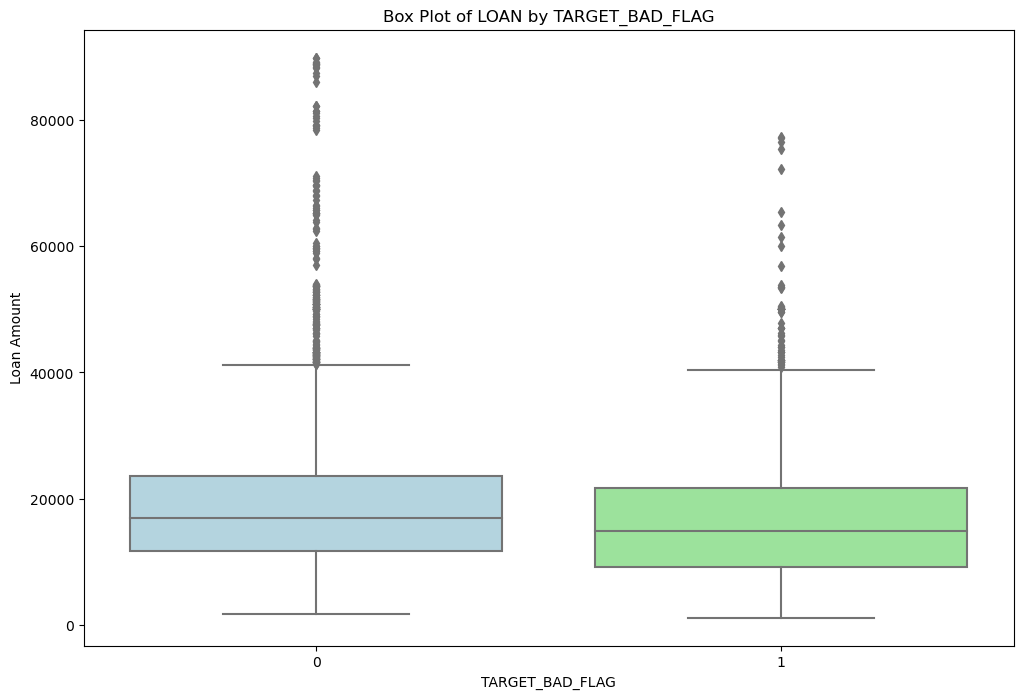

In [5]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='TARGET_BAD_FLAG', y='LOAN', data=df, palette=["lightblue", "lightgreen"])
plt.title('Box Plot of LOAN by TARGET_BAD_FLAG')
plt.xlabel('TARGET_BAD_FLAG')
plt.ylabel('Loan Amount')
plt.show()

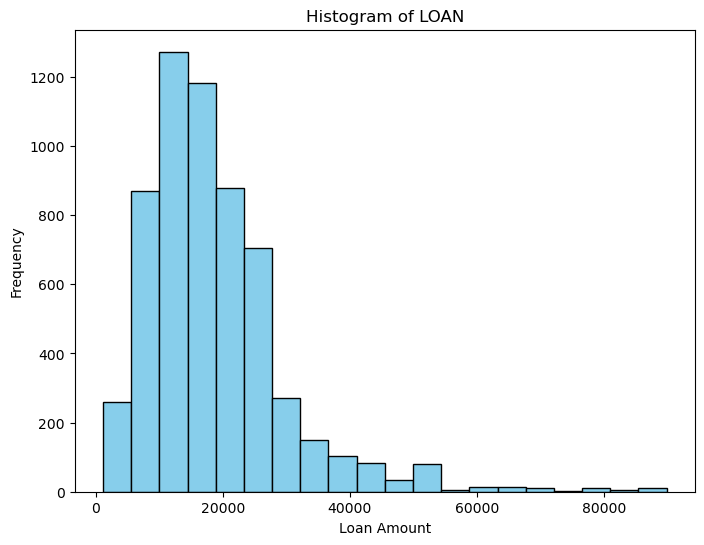

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(df['LOAN'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of LOAN')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


In [7]:

# Impute missing values for target variable
df['TARGET_LOSS_AMT'].fillna(0, inplace=True)

# Impute missing values for remaining numeric variables
numeric_variables = ['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

for var in numeric_variables:
    median_value = df[var].median()
    df[var].fillna(median_value, inplace=True)
    df['IMP_' + var] = df[var]
    df['M_' + var] = np.where(df[var].isnull(), 1, 0)
    del df[var]

# Run a summary to prove that all the variables have been imputed
print(df.info())

# Compute sum for all the M_ variables to prove that the number of flags is equal to the number of missing values
m_variables = [col for col in df.columns if col.startswith('M_')]
missing_values_sum = df[m_variables].sum().sum()
print("Total number of missing values flagged:", missing_values_sum)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET_BAD_FLAG  5960 non-null   int64  
 1   TARGET_LOSS_AMT  5960 non-null   float64
 2   LOAN             5960 non-null   int64  
 3   REASON           5708 non-null   object 
 4   JOB              5681 non-null   object 
 5   IMP_MORTDUE      5960 non-null   float64
 6   M_MORTDUE        5960 non-null   int32  
 7   IMP_VALUE        5960 non-null   float64
 8   M_VALUE          5960 non-null   int32  
 9   IMP_YOJ          5960 non-null   float64
 10  M_YOJ            5960 non-null   int32  
 11  IMP_DEROG        5960 non-null   float64
 12  M_DEROG          5960 non-null   int32  
 13  IMP_DELINQ       5960 non-null   float64
 14  M_DELINQ         5960 non-null   int32  
 15  IMP_CLAGE        5960 non-null   float64
 16  M_CLAGE          5960 non-null   int32  
 17  IMP_NINQ      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET_BAD_FLAG  5960 non-null   int64  
 1   TARGET_LOSS_AMT  5960 non-null   float64
 2   LOAN             5960 non-null   int64  
 3   REASON           5708 non-null   object 
 4   JOB              5681 non-null   object 
 5   IMP_MORTDUE      5960 non-null   float64
 6   M_MORTDUE        5960 non-null   int32  
 7   IMP_VALUE        5960 non-null   float64
 8   M_VALUE          5960 non-null   int32  
 9   IMP_YOJ          5960 non-null   float64
 10  M_YOJ            5960 non-null   int32  
 11  IMP_DEROG        5960 non-null   float64
 12  M_DEROG          5960 non-null   int32  
 13  IMP_DELINQ       5960 non-null   float64
 14  M_DELINQ         5960 non-null   int32  
 15  IMP_CLAGE        5960 non-null   float64
 16  M_CLAGE          5960 non-null   int32  
 17  IMP_NINQ      